<a href="https://colab.research.google.com/github/Het-Shah/MNE-Basic-Visualisation/blob/master/MDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne

     |████████████████████████████████| 6.3MB 3.5MB/s 
  Created wheel for mne: filename=mne-0.18.2-cp36-none-any.whl size=6316007 sha256=990be5ed2f97b255e2d136bbf2e2aa0f5f312fde461ae1221d486bd8cb81725f
  Stored in directory: /root/.cache/pip/wheels/71/40/30/fb9a9bdeac02c6b3b144be66ac345c5b5587a7d7610564535b
Successfully built mne


In [2]:
!wget https://ndownloader.figshare.com/articles/4244171/versions/2

--2019-09-11 04:34:50--  https://ndownloader.figshare.com/articles/4244171/versions/2
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 3.248.64.7, 54.72.75.14, 34.241.38.246, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|3.248.64.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851639264 (812M) [application/zip]
Saving to: ‘2’

2                   100%[===================>] 812.19M  24.1MB/s    in 33s     

2019-09-11 04:35:23 (24.9 MB/s) - ‘2’ saved [851639264/851639264]



In [3]:
!unzip 2

Archive:  2
 extracting: H S1 EC.edf             
 extracting: H S1 EO.edf             
 extracting: H S1 TASK.edf           
 extracting: H S2 EC.edf             
 extracting: H S2 EO.edf             
 extracting: H S2 TASK.edf           
 extracting: H S3 EC.edf             
 extracting: H S3 EO.edf             
 extracting: H S3 TASK.edf           
 extracting: H S4 EC.edf             
 extracting: H S4 EO.edf             
 extracting: H S4 TASK.edf           
 extracting: H S5 EC.edf             
 extracting: H S5 EO.edf             
 extracting: H S5 TASK.edf           
 extracting: H S6 EC.edf             
 extracting: H S6 EO.edf             
 extracting: H S6 TASK.edf           
 extracting: H S7 EC.edf             
 extracting: H S7 EO.edf             
 extracting: H S7 TASK.edf           
 extracting: H S8 EC.edf             
 extracting: H S8 EO.edf             
 extracting: H S8 TASK.edf           
 extracting: H S9 EC.edf             
 extracting: H S9 EO.edf             


In [0]:
import numpy as np 
import pandas as pd
import mne
from matplotlib import pyplot as plt 

%matplotlib inline 

In [5]:
raw = mne.io.read_raw_edf("/content/MDD S33 EO.edf", preload=True,stim_channel="auto")
raw.set_eeg_reference('average', projection=True)

Extracting EDF parameters from /content/MDD S33 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75775  =      0.000 ...   295.996 secs...
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawEDF  |  MDD S33 EO.edf, n_channels x n_times : 20 x 75776 (296.0 sec), ~11.6 MB, data loaded>

In [6]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, ...
    chs : list | 20 items (EEG: 20)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2013-05-20 15:34:16 GMT
    nchan : int | 20
    proc_history : list | 0 items
    projs : list | Average EEG reference: off
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info :

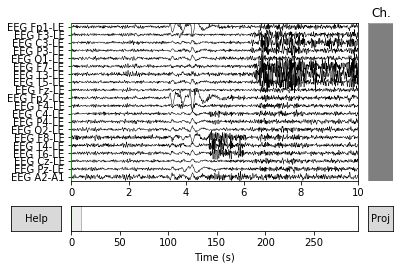

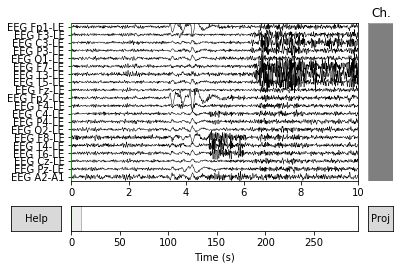

In [7]:
raw.plot(block=True, lowpass=40)

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 93 unique labels.


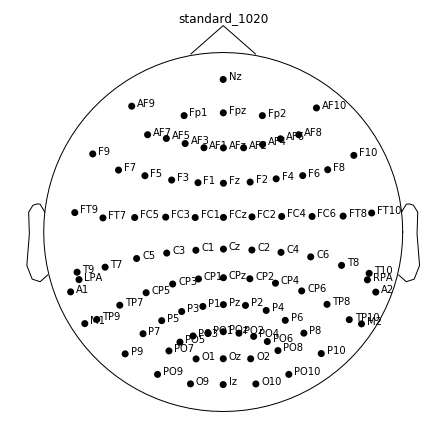

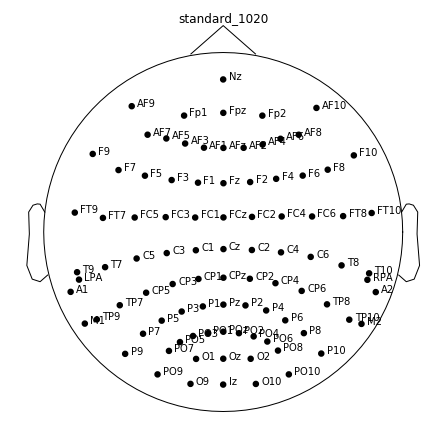

In [8]:
montage = mne.channels.read_montage("standard_1020")
montage.plot()

In [9]:
raw.rename_channels(lambda x : x[4:-3])
raw.set_montage(montage)
raw.set_eeg_reference("average")

Applying average reference.
Applying a custom EEG reference.
Removing existing average EEG reference projection.


<RawEDF  |  MDD S33 EO.edf, n_channels x n_times : 20 x 75776 (296.0 sec), ~11.6 MB, data loaded>

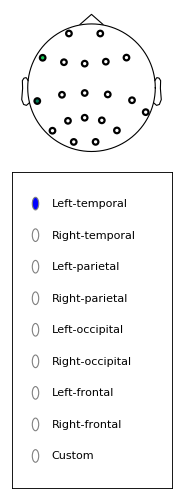

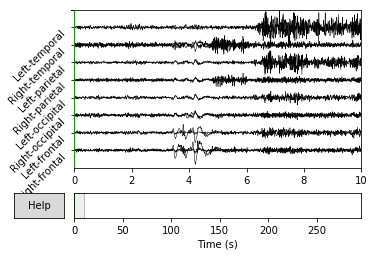

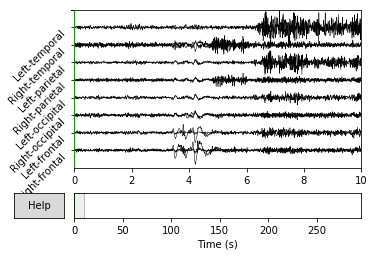

In [10]:
raw.plot(butterfly=True, group_by='position')

In [11]:
raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 samples (1.652 sec)



<RawEDF  |  MDD S33 EO.edf, n_channels x n_times : 20 x 75776 (296.0 sec), ~11.6 MB, data loaded>

In [12]:
raw.annotations

<Annotations  |  0 segments , orig_time : 2013-05-20 15:34:16>

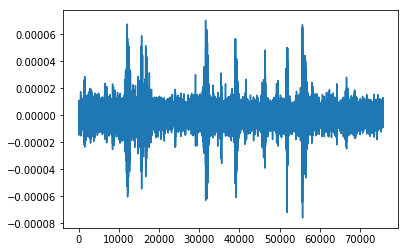

In [12]:
plt.plot(raw._data[-1])